The code in this file has the purpose of generating graphs from csv files.
Originallly made for tensorboard. 

In [218]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from utils import parse_file_name
import numpy as np

In [219]:
root = '/home/tiago/Dropbox/research/multiview_segmentation/etc/results'
target_dir = 'weighted_feature_loss'
target_file = 'hparams_table.csv'

out_path = os.path.join(root,target_dir)

path_target_file = os.path.join(root,target_dir,target_file)


if not os.path.isfile(path_target_file):
    raise NameError

print('\nLoading: ' + path_target_file)


Loading: /home/tiago/Dropbox/research/multiview_segmentation/etc/results/weighted_feature_loss/hparams_table.csv


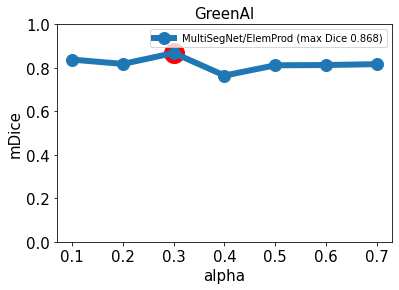

In [220]:
LINE_WIDTH = 6
MAX_POINT_SIZE = 20
LINE_MARKER_SIZE = 12 
AXIS_LABEL_SIZE = 15
AXIS_TICK_SIZE = 15
TITLE_SIZE = 15

max_values = []
min_values = []

xx_name = 'alpha'
yy_name = 'mDice'

plot_name = 'MultiSegNet'
title = 'GreenAI'

# Import CSV 
df = pd.read_csv(path_target_file)

plot_name = plot_name +'/'+ df['fusion'][0]
i_max = np.argmax(df[yy_name])
value_max = df[yy_name][i_max]

label = plot_name + f' (max Dice {round(value_max,3)})'

# Line 
ax = df.plot(x = xx_name,y=yy_name,
            label      = label,
            linewidth  = LINE_WIDTH,
            marker     = 'o',
            markersize = LINE_MARKER_SIZE
            )
# Highlight Max Value
ax.scatter(x=df[xx_name][i_max],y=df[yy_name][i_max],
            s =  (MAX_POINT_SIZE)**2,
            c ='r',
            alpha=1)

ax.set_xlabel(xx_name,fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel(yy_name,fontsize=AXIS_LABEL_SIZE)
ax.set_title(title,fontsize=TITLE_SIZE)
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)
ax.xaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)

plt.savefig(join(out_path,title) + '.pdf')
plt.savefig(join(out_path,title) + '.png')


